# Planeación campaña para la tienda online Ice 


**Objetivo**: Detectar patrones para crear una campaña publicitaria para el mercado de los videojuegos para la tienda ICE.

**Base de datos**: datos históricos sobre las ventas de juegos hasta el 2016.

# **Paso 1: Cargar y visulaizar la base de datos**

In [11]:
#Cargar librerías a utilizar 
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import scipy.stats as st

In [12]:
#Cargar la base de datos a trabajar
df=pd.read_csv("Analisis de mercado/data/games.csv")

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [14]:
#Visualizar base de datos
df.sample(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
6780,Hasbro Family Game Night 3,PS3,2010.0,Misc,0.18,0.04,0.00,0.03,NaN,tbd,E
387,Tekken 4,PS2,2002.0,Fighting,1.55,1.27,0.33,0.29,79.0,8.3,T
11524,Sherlock Holmes: Crimes & Punishments,XOne,2014.0,Adventure,0.03,0.04,0.00,0.01,NaN,NaN,NaN
9605,Drome Racers,PS2,2002.0,Racing,0.06,0.05,0.00,0.02,57.0,tbd,E
703,TOCA Touring Car Championship,PS,1997.0,Racing,0.07,2.00,0.02,0.18,NaN,NaN,NaN
9292,Call of Duty: Infinite Warfare,PC,2016.0,Shooter,0.04,0.08,0.00,0.01,73.0,3,M
10803,Jikkyou Powerful Pro Yakyuu 11,GC,2004.0,Sports,0.00,0.00,0.09,0.00,NaN,NaN,NaN
14108,Railroad Tycoon 3,PC,2003.0,Strategy,0.00,0.03,0.00,0.00,80.0,7.7,E
13672,Clockwork Empires,PC,NaN,Strategy,0.00,0.04,0.00,0.00,58.0,3.8,RP
8153,Armored Core: Last Raven,PS2,2005.0,Simulation,0.05,0.04,0.08,0.01,59.0,8.9,T


In [15]:
#Visualizar casos en la plataforma
df['Platform'].value_counts(dropna=False).sort_index()

Platform
2600     133
3DO        3
3DS      520
DC        52
DS      2151
GB        98
GBA      822
GC       556
GEN       29
GG         1
N64      319
NES       98
NG        12
PC       974
PCFX       1
PS      1197
PS2     2161
PS3     1331
PS4      392
PSP     1209
PSV      430
SAT      173
SCD        6
SNES     239
TG16       2
WS         6
Wii     1320
WiiU     147
X360    1262
XB       824
XOne     247
Name: count, dtype: int64

# Paso 2: **Procesamiento de datos**
- Cambiar los nombres de las columnas a snake_case.
- Cambiar los nombres de los videojuegos a mayúscula
- Trabajar los valores perdidos de las columnas:Name, Year_of_Release, Critic_Score, User_Score y Rating 
- Cambiar el tipo de dato de la columna  Year_of_Release a tipo entero.
- Cambiar el tipo de dato de la columna  user_score a float y multiplicar por 10.
- Agrupar las opciones existentes en tipologias de formas que se cree la columna plataform_group
- Crear una columna nueva que agrupe las plataformas
- Identificar duplicados
- Calcular las ventas totales (la suma de las ventas en todas las regiones) 

In [16]:
#Cambiar los nombres de las columnas a snake_case.
df.columns=[x.lower().replace(" ","") for x in df.columns]

In [17]:
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [18]:
#Cambiar los nombres de los videojuegos a mayúscula y quitar espacios
df['name']=df['name'].str.upper()
df['name']=df['name'].str.strip()
df['name']=df['name'].str.replace('.','').str.replace(',','').str.replace(';','').str.replace(':','')

In [19]:
df.sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
11498,TONY HAWK'S PRO SKATER 3,N64,2002.0,Sports,0.06,0.02,0.00,0.00,NaN,NaN,NaN
4249,RUGRATS CASTLE CAPERS,GBA,2001.0,Action,0.33,0.12,0.00,0.01,NaN,NaN,NaN
13846,THE DA VINCI CODE,XB,2006.0,Action,0.03,0.01,0.00,0.00,52.0,2.8,T
11808,GLADIUS,GC,2003.0,Strategy,0.06,0.01,0.00,0.00,82.0,8.8,T
1167,POKEMON BATTLE REVOLUTION,Wii,2006.0,Role-Playing,0.78,0.37,0.30,0.13,53.0,6.7,E
5338,TRACKMANIA TURBO,PS4,2016.0,Action,0.03,0.26,0.00,0.05,81.0,7.9,E
7735,TEST DRIVE UNLIMITED 2,PC,NaN,Racing,0.05,0.11,0.00,0.03,72.0,5.7,T
11922,THE CROODS PREHISTORIC PARTY!,Wii,2013.0,Misc,0.01,0.05,0.00,0.00,NaN,NaN,NaN
14087,MAHJONG TAIKAI,DS,2004.0,Misc,0.00,0.00,0.04,0.00,NaN,NaN,NaN
15209,FRANKLIN'S GREAT ADVENTURES,DS,2006.0,Action,0.02,0.00,0.00,0.00,NaN,NaN,E


In [20]:
#Trabajar los valores perdidos de la columna Name
df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Para la columna name, solo hay dos valores perdidos, estos valores ausentes pueden deberse a qué 1993 no había un registro consolidado, la persona que recogió todos estos datos se le pudo dificultar estos dos nombres, se decide reemplazar estos valores por con la observación NOT DEFINED

In [21]:
df['name'] = df['name'].fillna('NOT DEFINED')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [22]:
#Trabajar los valores perdidos de la columna Year_of_Release
df = df.dropna(subset=['year_of_release'])

Se decide eliminar los valores nulos de las columna year_of release debido a que  reemplazarlo con la media o la mediana implicaría sesgar nuestro análisis, además necesito convertir estos datos a tipo entero para trabajar. La perdida de registro fue de 269.

In [23]:
#Cambiar el tipo de dato de la columna Year_of_Release a tipo entero.
df['year_of_release']=df['year_of_release'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16446 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


**Trabajar los valores perdidos de la columna user_score**
- Sustituir 'tbd' por un valor perdido numérico 
- Transformar a tipo numérico float 
- Multiplicar por 10 de forma que se estandaricen las magnitudes con el otro score de la tabla

In [24]:
df.loc[df['user_score'] == 'tbd', 'user_score'] = np.nan

# Transformar la columna a float
df['user_score'] = df['user_score'].astype(float)

# Multiplicar por 10
df['user_score'] = df['user_score'] * 10

df.info(10)

<class 'pandas.core.frame.DataFrame'>
Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16446 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


**Trabajar los valores perdidos de la columna Rating**

***Notas para comprender este rating:***
El Entertainment Software Rating Board (ESRB) es un organismo que clasifica los videojuegos según su contenido. Las clasificaciones son: 

E (Todos): Para todas las edades, aunque puede contener violencia leve, lenguaje levemente soez, o un uso poco frecuente de lenguaje levemente soez. 

E10 (Todos +10): Para mayores de 10 años, aunque puede contener violencia leve, lenguaje levemente soez, o una mínima cantidad de temas insinuantes. 

T (Adolescentes): Para mayores de 13 años, aunque puede contener violencia, temas insinuantes, humor vulgar, o un uso poco frecuente de lenguaje muy soez. 

M (Maduro): Para mayores de 17 años, aunque puede contener violencia explícita, escenas sangrientas, contenido sexual o lenguaje muy soez. 

AO (Adultos únicamente): Para mayores de 18 años, aunque puede incluir escenas prolongadas de violencia explícita o contenido sexual gráfico y desnudos. 

K-A (Kids to Adults) para videojuegos fue cambiada a E (Everyone) en 1998

RP en los videojuegos significa que el juego aún no ha sido evaluado por especialistas y está en espera de una calificación final


In [25]:
df['rating'].value_counts()

rating
E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
AO         1
RP         1
Name: count, dtype: int64

In [26]:
#Crear una función que modifique los nombres de los rating
def Rat(x):
    if x=='E' or x=='K-A':
        return 'Everyone'
    elif x=='T':
        return 'Teens'
    elif x=='M':
        return 'Mature'
    elif x=='E10+':
        return 'Everyone 10y+'
    elif  x=='EC':
        return 'Early childhood'
    elif x=='RP':
        return 'Pending'
    elif x =='AO':
        return 'Adults Only'
    else:
        return 'Pending'

In [27]:
#Aplicar la función a la columna rating
df['rating_name']=df['rating'].apply(Rat)
df.sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,rating_name
739,ROCK BAND 2,X360,2008,Misc,1.78,0.24,0.00,0.18,92.0,83.0,T,Teens
1759,GAUNTLET DARK LEGACY,PS2,2001,Action,0.56,0.44,0.00,0.15,73.0,83.0,T,Teens
7116,3RD SUPER ROBOT WARS Z JIGOKU HEN,PS3,2014,Role-Playing,0.00,0.00,0.23,0.00,NaN,NaN,NaN,Pending
8826,NBA SHOOTOUT 2001,PS2,2001,Sports,0.07,0.06,0.00,0.02,54.0,NaN,E,Everyone
5216,ESPN NFL FOOTBALL,XB,2003,Sports,0.27,0.08,0.00,0.01,91.0,89.0,E,Everyone
11274,WINTER SPORTS 2 THE NEXT CHALLENGE,PS2,2008,Sports,0.04,0.03,0.00,0.01,NaN,NaN,E,Everyone
7908,RISEN,X360,2009,Role-Playing,0.07,0.11,0.00,0.01,60.0,64.0,M,Mature
10078,THE KING OF FIGHTERS '99,PS,2000,Fighting,0.00,0.00,0.11,0.01,NaN,89.0,T,Teens
1415,POCKET MONSTERS STADIUM,N64,1998,Strategy,0.00,0.00,1.37,0.00,NaN,NaN,NaN,Pending
10726,DRAGON BALL EVOLUTION,PSP,2009,Fighting,0.09,0.00,0.00,0.01,28.0,9.0,T,Teens


In [28]:
df['rating_name'].value_counts()

rating_name
Pending            6679
Everyone           3924
Teens              2905
Mature             1536
Everyone 10y+      1393
Early childhood       8
Adults Only           1
Name: count, dtype: int64

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16446 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16446 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
 11  rating_name      16446 non-null  object 
dtypes: float64(6), int64(1), object(5)
memory usage: 1.6+ MB


Crear una columna platform_group para mejorar nuestro análisis, ya que si lo hacemos individual será un poco difcil de comprender o encontrar patrones.

In [30]:
# Revisar los valores único de la columna platform
df['platform'].value_counts()

platform
PS2     2127
DS      2121
PS3     1306
Wii     1286
X360    1232
PSP     1193
PS      1190
PC       957
GBA      811
XB       803
GC       542
3DS      512
PSV      429
PS4      392
N64      316
XOne     247
SNES     239
SAT      173
WiiU     147
2600     116
NES       98
GB        97
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: count, dtype: int64

# Notas
**PlayStation=** (PS2, PS3, PSP, PS,PSV, PS4)

**Nintendo=** (DS,Wii, WiiU, GBA, 3DS, N64,SNES, NES, GB, NG, SCD, WS)

**Xbox=**(X360, XB, XOne)

**sega =** (GG, GEN, SAT, DC)

**PC=**(PC)

**Otras=** (3DO, TG16, PCFX, 2600)

In [31]:
#Definir la función
def group_platform(x):
    if x in ['PS2', 'PS3', 'PSP', 'PS', 'PSV', 'PS4']:
        return 'PlayStation'
    elif x in ['DS', 'Wii', 'WiiU', 'GBA', '3DS', 'N64', 'SNES', 'NES', 'GB', 'NG', 'SCD', 'WS']:
        return 'Nintendo'
    elif x in ['X360', 'XB', 'XOne']:
        return 'Xbox'
    elif x in ['GG', 'GEN', 'SAT', 'DC']:
        return 'Sega'
    else:
        return 'Otras'

In [32]:
#Crear la columna platform_group
df['platform_group']=df['platform'].apply(group_platform)

In [33]:
df['platform_group'].value_counts()

platform_group
PlayStation    6637
Nintendo       5651
Xbox           2282
Otras          1621
Sega            255
Name: count, dtype: int64

In [34]:
#8. Identificar duplicados
df[df[['name','platform']].duplicated()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,rating_name,platform_group
1591,NEED FOR SPEED MOST WANTED,X360,2005,Racing,1.0,0.13,0.02,0.10,83.0,85.0,T,Teens,Xbox
11715,NEED FOR SPEED MOST WANTED,PC,2012,Racing,0.0,0.06,0.00,0.02,82.0,85.0,T,Teens,Otras
14244,NOT DEFINED,GEN,1993,NaN,0.0,0.00,0.03,0.00,NaN,NaN,NaN,Pending,Sega
16230,MADDEN NFL 13,PS3,2012,Sports,0.0,0.01,0.00,0.00,83.0,55.0,E,Everyone,PlayStation


In [35]:
#Eliminar los duplicados de esta columna

df = df.drop_duplicates(subset=['name', 'platform'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16442 entries, 0 to 16714
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16442 non-null  object 
 1   platform         16442 non-null  object 
 2   year_of_release  16442 non-null  int64  
 3   genre            16441 non-null  object 
 4   na_sales         16442 non-null  float64
 5   eu_sales         16442 non-null  float64
 6   jp_sales         16442 non-null  float64
 7   other_sales      16442 non-null  float64
 8   critic_score     7980 non-null   float64
 9   user_score       7460 non-null   float64
 10  rating           9765 non-null   object 
 11  rating_name      16442 non-null  object 
 12  platform_group   16442 non-null  object 
dtypes: float64(6), int64(1), object(6)
memory usage: 1.8+ MB


In [36]:
#Verificar los valores perdidos
df[df['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,rating_name,platform_group
659,NOT DEFINED,GEN,1993,NaN,1.78,0.53,0.0,0.08,NaN,NaN,NaN,Pending,Sega


In [37]:
#Imputar valores perdidos
df['genre']=df['genre'].fillna('Not Defined')

In [38]:
#9. Calcular las ventas totales
df['total_sales']=df[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)
df.sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,rating_name,platform_group,total_sales
8287,RESIDENT EVIL DIRECTOR'S CUT DUAL SHOCK EDITION,PS,1997,Action,0.00,0.00,0.16,0.01,NaN,NaN,NaN,Pending,PlayStation,0.17
12265,JUST DANCE DISNEY PARTY 2,X360,2015,Action,0.05,0.01,0.00,0.01,NaN,NaN,E,Everyone,Xbox,0.07
6118,LEGO THE LORD OF THE RINGS,PSV,2012,Action,0.09,0.13,0.00,0.06,54.0,56.0,E10+,Everyone 10y+,PlayStation,0.28
4404,TONY HAWK'S PROVING GROUND,PS3,2007,Sports,0.36,0.04,0.00,0.04,73.0,66.0,T,Teens,PlayStation,0.44
3316,MADDEN NFL 2000,N64,1999,Sports,0.58,0.02,0.00,0.00,NaN,NaN,NaN,Pending,Nintendo,0.60
10673,OVER THE HEDGE,XB,2006,Platform,0.07,0.02,0.00,0.00,61.0,NaN,E10+,Everyone 10y+,Xbox,0.09
1674,FIFA SOCCER 07,PSP,2006,Sports,0.25,0.64,0.00,0.31,NaN,NaN,NaN,Pending,PlayStation,1.20
2044,ACE COMBAT 6 FIRES OF LIBERATION,X360,2007,Simulation,0.69,0.04,0.22,0.06,80.0,79.0,T,Teens,Xbox,1.01
9207,TRANSFORMERS DEVASTATION,XOne,2015,Action,0.09,0.04,0.00,0.01,75.0,79.0,T,Teens,Xbox,0.14
8149,CHUCK E CHEESE'S PARTY GAMES,DS,2010,Misc,0.17,0.00,0.00,0.01,NaN,NaN,E,Everyone,Nintendo,0.18


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16442 entries, 0 to 16714
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16442 non-null  object 
 1   platform         16442 non-null  object 
 2   year_of_release  16442 non-null  int64  
 3   genre            16442 non-null  object 
 4   na_sales         16442 non-null  float64
 5   eu_sales         16442 non-null  float64
 6   jp_sales         16442 non-null  float64
 7   other_sales      16442 non-null  float64
 8   critic_score     7980 non-null   float64
 9   user_score       7460 non-null   float64
 10  rating           9765 non-null   object 
 11  rating_name      16442 non-null  object 
 12  platform_group   16442 non-null  object 
 13  total_sales      16442 non-null  float64
dtypes: float64(7), int64(1), object(6)
memory usage: 1.9+ MB


Se determinar trabajar con los valores perdidos de las columnas critic_score y user_score, ya que si se elimina se perdería una cantidad importante de datos

# Paso 3. Análisis de los datos

In [40]:
# Obtener la primera y última aparición de cada plataforma
platform_first_last = df.groupby('platform')['year_of_release'].agg(['min', 'max'])

# Calcular la duración entre la primera y última aparición para cada plataforma
platform_first_last['duration'] = platform_first_last['max'] - platform_first_last['min']

# Promediar las duraciones para todas las plataformas
average_duration = platform_first_last['duration'].mean()
print(average_duration)

7.612903225806452


En promedio, una plataforma dura 7 años para desaparecer del mercado, se puede decir que este mercado es estable, pero para que una nueva empresa ingrese a este mercado es complicado, ya que se podría decir que es oligopolio, con una barrera fuerte de entrada.

In [41]:
#¿ Cuántos juegos fueron lanzados en diferentes años. ¿Son significativos los datos de cada período?
games_per_year = df['year_of_release'].value_counts().sort_index()
print(games_per_year)

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      61
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     938
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     651
2013     544
2014     581
2015     606
2016     502
Name: count, dtype: int64


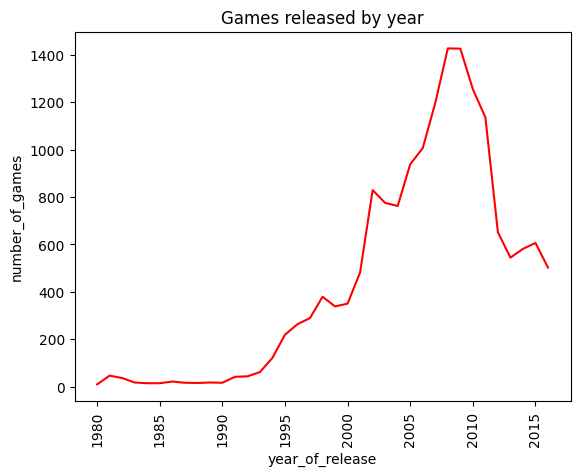

In [42]:
#Visualizar en un gráfico de líneas el resultado anterior
games_per_year.plot(
kind='line',
title='Games released by year',
xlabel='year_of_release',
ylabel='number_of_games',
color='red',
legend=None,
rot = 90
)
plt.show()

**Comentarios del gráfico anterior**
- A partir del año 2000 se puede evidenciar el gran crecimiento que experimento el sector de los videojuegos, esto se debe que a partir del año 2000 se introdujeron nuevos juegos  de alta definición, y la entrada de Microsoft a esta industria dominada por Nintendo y Sony. 

- Se puede evidenciar que la Gran Recesión financiera del 2008 afectó este mercado por eso a partir de esa fecha se ve una caída sustancial en ese mercado, el cual, hasta el 2016 no ha experimentado un crecimiento como en los periodos anteriores.

Para crear un modelo de datos para el 2017, tomaré los datos desde 1995, ya que a partir de esa fecha el mercado de los videojuegos a experimentado un crecimiento

In [43]:
#Eliminar años de poca venta
df.query('year_of_release >= 1995', inplace=True)

<function matplotlib.pyplot.show(close=None, block=None)>

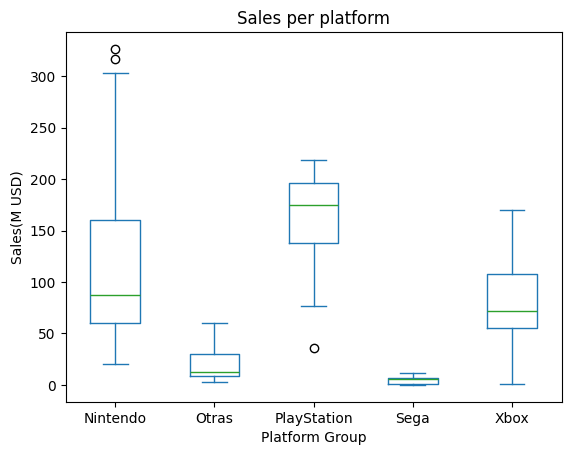

In [44]:
#Crear un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma.

sales_per_platform=df.pivot_table(
index='year_of_release',
columns='platform_group',
values='total_sales',
aggfunc='sum')
#Crear un gráfico de caja
sales_per_platform.plot(
kind='box',
xlabel='Platform Group',
ylabel='Sales(M USD)',
title='Sales per platform')
plt.show

Gráficamente se visualiza que la media de las plataformas difieren significativamente, se tiene que realizar una prueba estadisticas para confirmar.

In [45]:
#¿Son significativas las diferencias en las ventas entre Nintendo y Playstation?
lista=['Nintendo','PlayStation']
df.query('platform_group in @lista',inplace=True)

In [46]:
#Extraer las muestras para el análisis
muestra_NS=sales_per_platform['Nintendo']
muestra_PS=sales_per_platform['PlayStation']
print(muestra_NS)
print(muestra_PS)

year_of_release
1995     36.13
1996     86.15
1997     46.86
1998     76.36
1999     96.59
2000     54.48
2001     74.30
2002     74.24
2003     56.67
2004     95.18
2005    164.00
2006    262.24
2007    303.11
2008    316.63
2009    326.51
2010    212.97
2011    149.03
2012    101.64
2013     88.35
2014     69.54
2015     45.27
2016     19.92
Name: Nintendo, dtype: float64
year_of_release
1995     35.96
1996     94.70
1997    136.17
1998    169.49
1999    144.53
2000    135.54
2001    202.02
2002    212.05
2003    186.38
2004    218.87
2005    204.50
2006    179.70
2007    196.11
2008    206.97
2009    195.11
2010    182.85
2011    179.68
2012    131.23
2013    152.97
2014    159.90
2015    142.09
2016     77.10
Name: PlayStation, dtype: float64


**Prueba de hipótesis**

Ho:Las ventas promedio de Nintendo son iguales a las ventas promedios de PlayStation

Ha:Las ventas promedio de Nintendo son diferentes a las ventas promedios de PlayStation

In [47]:
#Calcular las desviaciones de las muestras
print (f"Desv. de Nintendo:{np.std(muestra_NS)}")
print (f"Desv. de PlayStation:{np.std(muestra_PS)}")

Desv. de Nintendo:94.01391509564725
Desv. de PlayStation:45.65031197561605


**Revisar si las varianzas son iguales**

Ho:Las varianzas son iguales

Ha: Las varianzas son diferentes

In [48]:
#Prueba de Levene
alfa = 0.05
pval = st.levene(muestra_NS, muestra_PS).pvalue

if pval > alfa:
    print("No rechazo la Ho: las varianzas son iguales.")
else:
    print("Rechazo la Ho: las varianzas no son iguales.")

No rechazo la Ho: las varianzas son iguales.


In [49]:
#Prueba T
alfa=0.05
st.ttest_ind(muestra_NS, muestra_PS,equal_var=True).pvalue
if pval > alfa:
    print("No rechazo la Ho: las medias son iguales.")
else:
    print("Rechazo la Ho: las medias no son iguales.")

No rechazo la Ho: las medias son iguales.


En promedio, la media de las ventas totales de Nintendo y PlayStation son iguales

**Revisar las reseñas de usuarios y profesionales afectan las ventas de PlayStation**

In [50]:
print(df['platform_group'].unique())

['Nintendo' 'PlayStation']


In [51]:
df.query("year_of_release > 2013", inplace=True)
df_PS=df[df['platform_group']=='PlayStation']
df_PS.sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,rating_name,platform_group,total_sales
14490,THE VOICE,PS3,2014,Action,0.02,0.00,0.00,0.01,NaN,NaN,NaN,Pending,PlayStation,0.03
11255,SD GUNDAM G GENERATION GENESIS,PSV,2016,Strategy,0.00,0.00,0.09,0.00,NaN,NaN,NaN,Pending,PlayStation,0.09
12728,MX VS ATV SUPERCROSS ENCORE,PS4,2015,Sports,0.00,0.05,0.00,0.01,42.0,41.0,E,Everyone,PlayStation,0.06
15646,NIL ADMIRARI NO TENBIN TEITO GENWAKU TOUKIDAN,PSV,2016,Adventure,0.00,0.00,0.02,0.00,NaN,NaN,NaN,Pending,PlayStation,0.02
12352,UTAWARERUMONO FUTARI NO HAKUORO,PSV,2016,Misc,0.00,0.00,0.06,0.00,NaN,NaN,NaN,Pending,PlayStation,0.06


In [52]:
df_PS[['total_sales','critic_score','user_score']].describe()

,total_sales,critic_score,user_score
count,903.000000,327.000000,413.000000
mean,0.419812,71.562691,67.813559
std,1.132043,11.865616,15.630491
min,0.010000,19.000000,2.000000
25%,0.030000,66.000000,61.000000
50%,0.080000,73.000000,72.000000
75%,0.290000,80.000000,79.000000
max,14.630000,97.000000,93.000000


En el aspecto de las calificaciones, PlayStation le ha ido sobresaliente, ya que sus calificaciones están por encima del 60% y en promedio 8000

**Revisar las variables critic_score y user_score con respecto a las ventas**

**User Score:** Es la calificación que los jugadores o usuarios le otorgan a un videojuego. Generalmente, estas calificaciones se recogen en plataformas de videojuegos donde los usuarios pueden dejar su opinión.

**critic_score:** Es la calificación que los críticos especializados en videojuegos le otorgan a un título. Estas reseñas suelen ser publicadas por revistas, sitios web y medios especializados.

In [53]:
#Calcular la correlación
df_sales_score=df_PS[['total_sales','critic_score','user_score']]
df_sales_score.corr().round(4)

,total_sales,critic_score,user_score
total_sales,1.0000,0.3705,-0.0732
critic_score,0.3705,1.0000,0.5556
user_score,-0.0732,0.5556,1.0000


<function matplotlib.pyplot.show(close=None, block=None)>

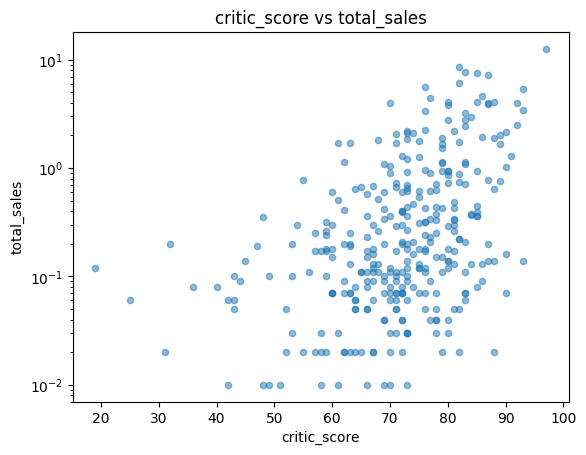

In [54]:
#Visualizar la correlación critic_score vs total_sales
df_sales_score.plot(
kind='scatter',
title='critic_score vs total_sales',
x='critic_score',
y='total_sales',
alpha=0.5
)
plt.yscale("log")
plt.show

Existe una relación positiva, entre las variables critic_score vs total_sales, es decir, cuando las el critic_score aumenta, las ventas totales también aumenta.

<function matplotlib.pyplot.show(close=None, block=None)>

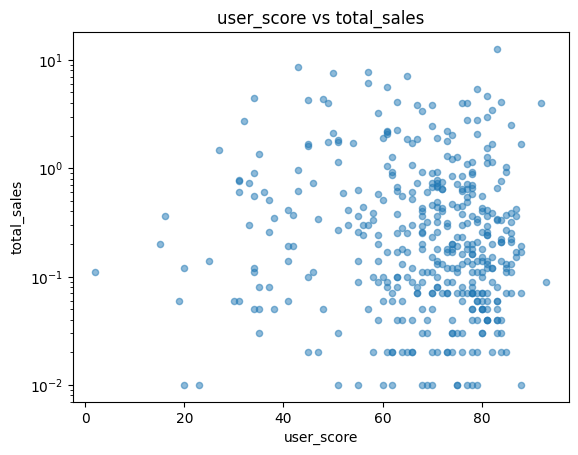

In [55]:
#Visualizar la correlación user_score vs total_sales
df_sales_score.plot(
kind='scatter',
title='user_score vs total_sales',
x='user_score',
y='total_sales',
alpha=0.5)
plt.yscale("log")
plt.show

Existe una relación negativa entre user_score y total_sales. Esto indica que, a medida que el puntaje de user_score aumenta, las ventas totales tienden a disminuir. Esta relación implica una disminución aproximada del 0.07% en las ventas totales por cada incremento de una unidad en user_score.

**Determinar las preferencias por género**

In [56]:
#Cambia las preferencias por género
df_sales_genre=df.groupby("genre").agg(
na_sales=("na_sales","sum"),
jp_sales=("jp_sales","sum"),
eu_sales=("eu_sales","sum"))

df_sales_genre


,na_sales,jp_sales,eu_sales
genre,,,
Action,46.70,29.51,56.03
Adventure,3.34,3.57,4.24
Fighting,10.49,6.36,5.99
Misc,9.89,5.60,10.68
Platform,6.37,2.69,6.42
Puzzle,0.65,0.93,0.52
Racing,5.31,1.72,9.15
Role-Playing,23.84,31.13,21.21
Shooter,34.95,4.68,41.67


In [57]:
#Calcular la proporción, ya que estos nos permite hacer un análisis equitativo
df_sales_genre_part=df_sales_genre/df_sales_genre.sum(axis=0)*100
df_sales_genre_part

,na_sales,jp_sales,eu_sales
genre,,,
Action,27.920603,31.837307,29.339687
Adventure,1.996891,3.851548,2.220244
Fighting,6.271673,6.861582,3.136618
Misc,5.912950,6.041644,5.592501
Platform,3.808442,2.902147,3.361785
Puzzle,0.388617,1.003344,0.272294
Racing,3.174698,1.855648,4.791328
Role-Playing,14.253258,33.585069,11.106457
Shooter,20.895612,5.049088,21.820181


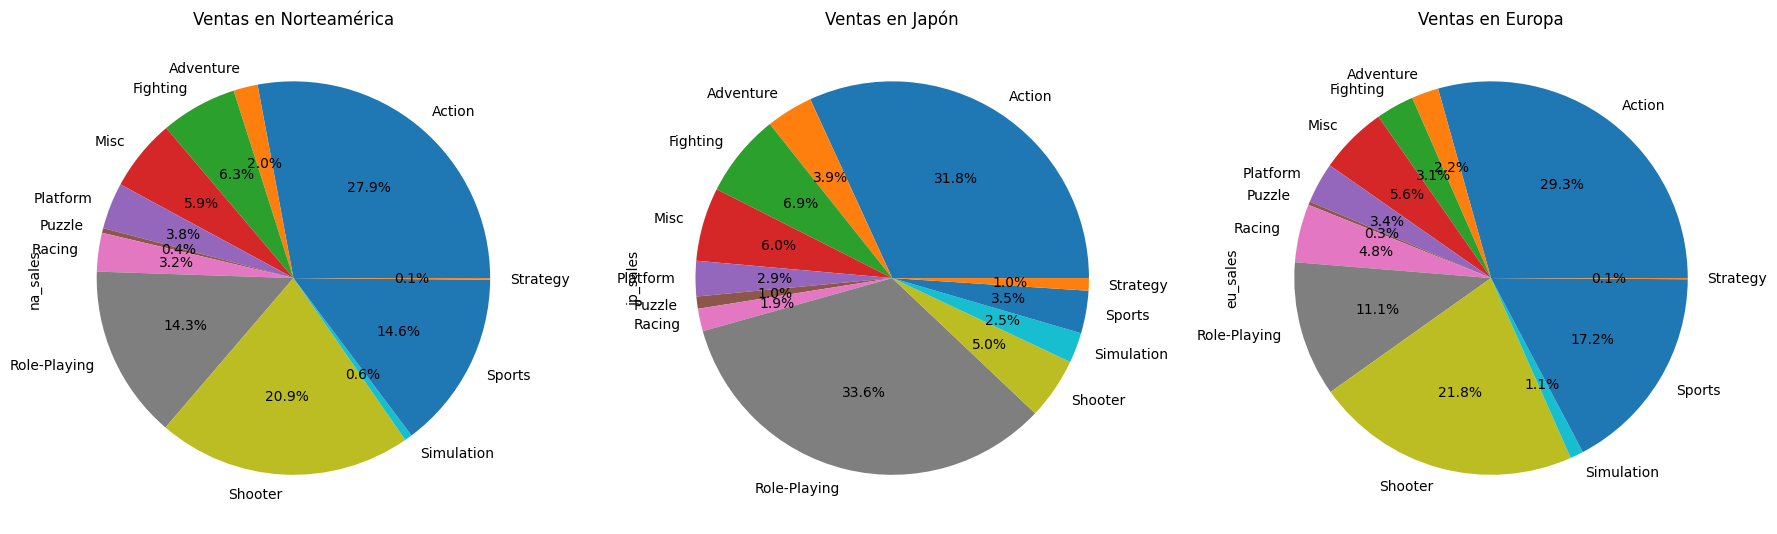

In [58]:
#visualizar  para Norteamerica
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Crear gráficos de pastel para las ventas en diferentes regiones
df_sales_genre_part['na_sales'].plot(
    kind="pie",
    ax=ax[0],  # Primer subplot
    autopct='%1.1f%%',  # Mostrar porcentajes
    title="Ventas en Norteamérica"
)

df_sales_genre_part['jp_sales'].plot(
    kind="pie",
    ax=ax[1],  # Segundo subplot
    autopct='%1.1f%%',  # Mostrar porcentajes
    title="Ventas en Japón"
)

df_sales_genre_part['eu_sales'].plot(
    kind="pie",
    ax=ax[2],  # Tercer subplot
    autopct='%1.1f%%',  # Mostrar porcentajes
    title="Ventas en Europa"
)

# Ajustar el diseño para evitar superposición
plt.tight_layout()
plt.show()

# Conclusiones

- Las industrias que dominan el mercado de los videojuegos son playstation y Nintendo, las cuales, estadisticamente tiene una varianza y medias iguales.

- Para incrementar las ventas para el año 2017, se debe diversificar los tipos de juegos por región, cada pais tiene culturas diferentes, y por ende sus preferencias en juegos son diferentes, Los esfuerzos de campañas publicitarias se deben concentrar en juegos que están teniendo pocas ventas para cada país. Asimismo, para los próximas inversiones en juegos, se debe considerar que  Estados Unidos los juegos prefereidos son acción, shooter y deporte, para Japón, olos juegos preferidos son Role-Playing y Action y para Europa, los preferidos son: acción y shooter.

- La mayoria del esfuerzo debe centrase en obtener buenas calificaciones en el critic_score, ya que está tiene una relación positiva con respecto a las ventas totales.

- Son 7 años aproximadamente para que una empresa salga del mercado de los videojuegos, aunque este sector es estable, los esfuerzos para entrar son complejos, ya que este mercado es un oligopolio que actualmente está dominado por Playstation, Nintendo y Xbox.